In [511]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [516]:
print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

In [517]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

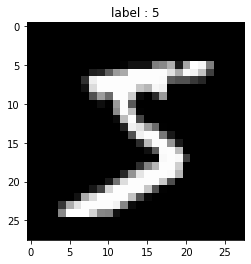

In [518]:
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

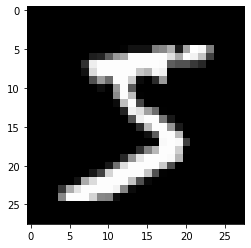

In [519]:
plt.imshow(image, 'gray', vmin = 0, vmax = 255)

In [520]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


In [521]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


In [522]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

(48000, 784)
(12000, 784)


In [523]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

(38400, 784)
(9600, 784)


In [233]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

In [248]:
get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)
#print(len(get_mini_batch)) # 2400
#print(get_mini_batch[5]) # 5番目のミニバッチが取得できる
for mini_X_train, mini_y_train in get_mini_batch:
    mini_X_train

【問題1】重みの初期値を決めるコードの作成

In [45]:
#　初期値を決める関数を作成する
import numpy as np
def initial_value(n_features,n_nodes,sigma = 0.01):
    W = sigma * np.random.randn(n_features, n_nodes)
    return W 

def initial_value_bias(n_nodes,sigma = 0.01):
    B = sigma * np.random.randn(n_nodes,)
    return B 

In [51]:
#　関数を使用して今回必要な初期値を制作しておく
# W1(784,400) B1(400,) W1(784,400) W2(400,200) B2(200,) W3(200,10) B3(10,) 

n_features1 = 784
n_nodes1 = 400
W1=initial_value(n_features1,n_nodes1,sigma = 0.01)
B1=initial_value_bias(n_nodes1,sigma = 0.01)

n_features2 = 400
n_nodes2 = 200
W2=initial_value(n_features2,n_nodes2,sigma = 0.01)
B2=initial_value_bias(n_nodes2,sigma = 0.01)

n_features3 = 200
n_nodes3 = 10
W3=initial_value(n_features3,n_nodes3,sigma = 0.01)
B3=initial_value_bias(n_nodes3,sigma = 0.01)

【完成雛形】

In [644]:
import numpy as np
import math 

class ScratchSimpleNeuralNetrowkClassifier():
    """
    シンプルな三層ニューラルネットワーク分類器
    Parameters
    ----------
    Attributes
    ----------
    """
    def __init__(self,ite_num, lr, first_nodes,second_nodes,third_nodes,verbose = True):
        self.verbose = verbose
        self.ite_num=ite_num
        self.lr = lr
        self.first_nodes=first_nodes
        self.second_nodes=second_nodes
        self.third_nodes=third_nodes
        self.loss = []
        self.val_loss = []
    
    # 初期値を決める関数
    def _initial_value(self,n_features,n_nodes,sigma = 0.01):
        W = sigma * np.random.randn(n_features, n_nodes)
        return W

    def _initial_value_bias(self,n_nodes,sigma = 0.01):
        B = sigma * np.random.randn(n_nodes,)
        return B
       
    # シグモイド関数を定義
    def _sigmo(self,X):
        return 1/(1+np.exp(-X))
       
    # ソフトマックス関数を定義
  
    def _softmax(self, A):
        return np.exp(A) / np.sum(np.exp(A), axis=1).reshape(-1, 1) 
    
    #def _softmax(self,a):
        #exp_a=np.exp(a)
        #sum_exp_a=sum(exp_a)
        #b=exp_a/sum_exp_a
        #return b
    
    # フォワードプロバゲーション
    def _forward_calculate(self,mini_X_train):
        self.A1=mini_X_train@self.W1+self.B1
        self.Z1=self._sigmo(self.A1)
        self.A2=self.Z1@self.W2+self.B2
        self.Z2=self._sigmo(self.A2)
        self.A3=self.Z2@self.W3+self.B3
        self.Z3=self._softmax(self.A3)
        
    # 交差エントロピー計算
    #def _cross_entropy(self, mini_y_train):
        #total=0
        #for i in range(len(self.Z3)):
            #total+=-np.log((self.Z3[i]*mini_y_train[i])+1e-7)/len(self.Z3)            
        #self.total=np.sum(total)
        
        
    def _cross_entropy_error(self,mini_y_train):
        L = - np.sum(mini_y_train * np.log(self.Z3)) / len(mini_y_train)
        self.total=L
   
    
    # バックプロバゲーション
    def _back_calculate(self,mini_X_train,mini_y_train):     
        # 「3層目」
        update3=(self.Z3-mini_y_train)/len(self.Z3)
        update3_B3=np.sum(update3, axis=0)
        update3_W3=self.Z2.T@update3
        update3_2=update3@self.W3.T
        # 3層目の更新
        self.B3=self.B3-self.lr*update3_B3
        self.W3=self.W3-self.lr*update3_W3

        # 「2層目」
        sigmo2=(1-self._sigmo(self.A2))*self._sigmo(self.A2)
        update2=update3_2*sigmo2
        update2_B2=np.sum(update2, axis=0)
        update2_W2=self.Z1.T@update2
        update2_2=update2@self.W2.T
        # 2層目の更新
        self.B2=self.B2-self.lr*update2_B2
        self.W2=self.W2-self.lr*update2_W2

        # 「1層目」
        sigmo1=(1-self._sigmo(self.A1))*self._sigmo(self.A1)
        update1=update2_2*sigmo1        
        update1_B1=np.sum(update1, axis=0)
        update1_W1=mini_X_train.T@update1
        # 1層目の更新
        self.B1=self.B1-self.lr*update1_B1
        self.W1=self.W1-self.lr*update1_W1
       
    
    
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        # 初期値を制作        
        self.W1=self._initial_value(X.shape[1],self.first_nodes,sigma = 0.01)
        self.B1=self._initial_value_bias(first_nodes,sigma = 0.01)
        
        self.W2=self._initial_value(self.first_nodes,self.second_nodes,sigma = 0.01)
        self.B2=self._initial_value_bias(self.second_nodes,sigma = 0.01)
        
        self.W3=self._initial_value(self.second_nodes,self.third_nodes,sigma = 0.01)
        self.B3=self._initial_value_bias(self.third_nodes,sigma = 0.01)
        
        
        # 処理を行う
        for _ in range(self.ite_num):
            get_mini_batch = GetMiniBatch(X,y,batch_size=20)
            for mini_X_train, mini_y_train in get_mini_batch:
                self._forward_calculate(mini_X_train)
                self._cross_entropy_error(mini_y_train)
                self._back_calculate(mini_X_train,mini_y_train)
            self.loss.append(self.total)
            
            if X_val is not None:
                self._forward_calculate(X_val)
                self._cross_entropy_error(y_val)
                self._back_calculate(X_val,y_val)
                self.val_loss.append(self.total)
        
        
        
        if self.verbose:
            #verboseをTrueにした際は学習過程などを出力する
            print()
        
    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        self._forward_calculate(X)
        y_pred=np.argmax(self.Z3, axis=1)
        
        return y_pred

【問題2】フォワードプロパゲーションの実装・・・上の雛形の_forward_calculateで制作

【問題3】交差エントロピー誤差の実装・・・上の雛形の_cross_entropy_errorで作成

【問題4】バックプロパゲーションの実装・・・上の雛形の_back_calculateで作成

【問題5】推定・・・上の雛形のpredictで作成

【問題6】学習と推定

In [660]:
# 実装したスクラッチを実行する
# 10回分のエポック、学習率0.1、その他の設定はテキストの指示通りである

ite_num=10
lr=0.1
first_nodes=400
second_nodes=200
third_nodes=10

SNN3=ScratchSimpleNeuralNetrowkClassifier(ite_num,lr, first_nodes,second_nodes,third_nodes,verbose = True)
SNN3.fit(X_train,y_train,X_val,y_val)

In [661]:
# Accuracyを計算
# 93%ほどとまずまず高いものとなった

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9372

【問題7】学習曲線のプロット

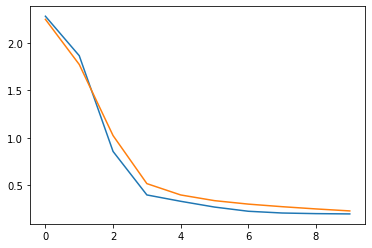

In [655]:
import matplotlib.pyplot as plt
plt.plot(SNN3.loss)
plt.plot(SNN3.val_loss)
plt.show()